C:\Users\Rober\miniconda3\envs\tf\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Rober\miniconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Rober\miniconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas.wcdjnk7yvmpzq2me2zzhjjrj3jikndb7.gfortran-win_amd64.dll
C:\Users\Rober\miniconda3\envs\tf\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


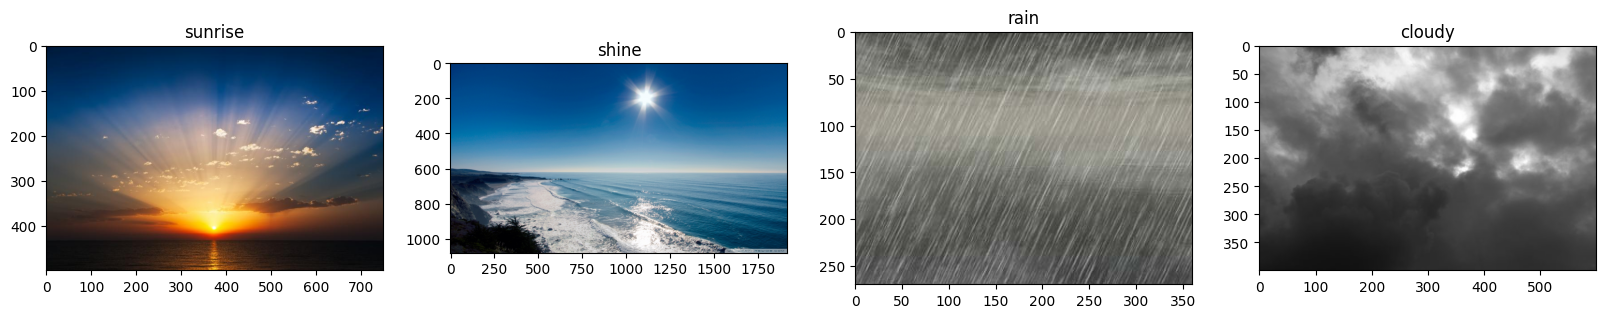

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Base directory for dataset
base_dir = 'Dangus'

# Directories for training and testing sets
train_dir = os.path.join(base_dir, 'mokymo_aibe')
test_dir = os.path.join(base_dir, 'testavimo_aibe')

# Categories
categories = ['sunrise', 'shine', 'rain', 'cloudy']

# Function to load images from a given directory
def load_images(directory):
    images = {}
    for category in categories:
        category_path = os.path.join(directory, category)
        images[category] = []
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = Image.open(img_path)
            images[category].append(img)
    return images

# Load training and testing images
train_images = load_images(train_dir)
test_images = load_images(test_dir)

# Display one image from each category from the training set
fig, axes = plt.subplots(1, len(categories), figsize=(20, 5))
for ax, category in zip(axes, categories):
    ax.imshow(train_images[category][0])
    ax.set_title(category)
plt.show()

# Note: This code assumes the structure of the directories and the presence of images. Adjustments might be needed
# for actual paths or different structures.


In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
# Example of using ImageDataGenerator for preprocessing and data augmentation
def create_datagen():
    return ImageDataGenerator(
        rescale=1./255,         # Normalize pixel values
        rotation_range=20,      # Random rotation between 0 and 20 degrees
        width_shift_range=0.2,  # Random horizontal shift
        height_shift_range=0.2, # Random vertical shift
        shear_range=0.2,        # Shear transformations
        zoom_range=0.2,         # Random zoom
        horizontal_flip=True,   # Random horizontal flip
        fill_mode='nearest'     # Strategy for filling in new pixels
    )

# Assuming images are already loaded in train_images and test_images as dictionaries of lists categorized by labels

def images_to_array(images_dict, size=(224, 224)):
    images_list = []
    labels_list = []
    label_map = {label: idx for idx, label in enumerate(images_dict.keys())}  # Label encoding
    for label, images in images_dict.items():
        for image in images:
            image = image.resize(size).convert('RGB')  # Resize and convert to RGB
            images_list.append(np.asarray(image))
            labels_list.append(label_map[label])
    return np.stack(images_list), np.array(labels_list)

# Convert images and labels to arrays with consistent size
train_images_array, train_labels_array = images_to_array(train_images)
test_images_array, test_labels_array = images_to_array(test_images)

# Create the data generators
train_datagen = create_datagen()
test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for test data, no augmentation

# Assuming the images are stored in 'train_images_array' and 'test_images_array'
# and their corresponding labels in 'train_labels_array' and 'test_labels_array'

# Define the batch size
batch_size = 32

# Create data generators
train_generator = train_datagen.flow(train_images_array, train_labels_array, batch_size=batch_size)
test_generator = test_datagen.flow(test_images_array, test_labels_array, batch_size=batch_size)


Epoch 1/69
34/34 [==============================] - 9s 258ms/step - loss: 0.9168 - accuracy: 0.6396 - val_loss: 0.8293 - val_accuracy: 0.7000
Epoch 2/69
34/34 [==============================] - 9s 257ms/step - loss: 0.6087 - accuracy: 0.7843 - val_loss: 0.6138 - val_accuracy: 0.7500
Epoch 3/69
34/34 [==============================] - 9s 255ms/step - loss: 0.5249 - accuracy: 0.8194 - val_loss: 0.7920 - val_accuracy: 0.8250
Epoch 4/69
34/34 [==============================] - 9s 255ms/step - loss: 0.4153 - accuracy: 0.8488 - val_loss: 0.3890 - val_accuracy: 0.9250
Epoch 5/69
34/34 [==============================] - 9s 254ms/step - loss: 0.3992 - accuracy: 0.8765 - val_loss: 0.7099 - val_accuracy: 0.8500
Epoch 6/69
34/34 [==============================] - 9s 255ms/step - loss: 0.3965 - accuracy: 0.8562 - val_loss: 0.8443 - val_accuracy: 0.8750
Epoch 7/69
34/34 [==============================] - 9s 262ms/step - loss: 0.3792 - accuracy: 0.8829 - val_loss: 0.8464 - val_accuracy: 0.8000
Epoch 

34/34 [==============================] - 9s 260ms/step - loss: 0.1514 - accuracy: 0.9447 - val_loss: 0.8487 - val_accuracy: 0.9500
Epoch 59/69
34/34 [==============================] - 9s 255ms/step - loss: 0.1350 - accuracy: 0.9465 - val_loss: 0.7340 - val_accuracy: 0.9500
Epoch 60/69
34/34 [==============================] - 9s 255ms/step - loss: 0.1860 - accuracy: 0.9226 - val_loss: 0.7929 - val_accuracy: 0.9500
Epoch 61/69
34/34 [==============================] - 9s 256ms/step - loss: 0.1612 - accuracy: 0.9382 - val_loss: 0.9256 - val_accuracy: 0.9500
Epoch 62/69
34/34 [==============================] - 9s 254ms/step - loss: 0.1543 - accuracy: 0.9419 - val_loss: 0.6660 - val_accuracy: 0.9750
Epoch 63/69
34/34 [==============================] - 9s 265ms/step - loss: 0.1444 - accuracy: 0.9456 - val_loss: 0.8998 - val_accuracy: 0.9500
Epoch 64/69
34/34 [==============================] - 9s 256ms/step - loss: 0.1643 - accuracy: 0.9484 - val_loss: 1.1769 - val_accuracy: 0.9500
Epoch 65/69

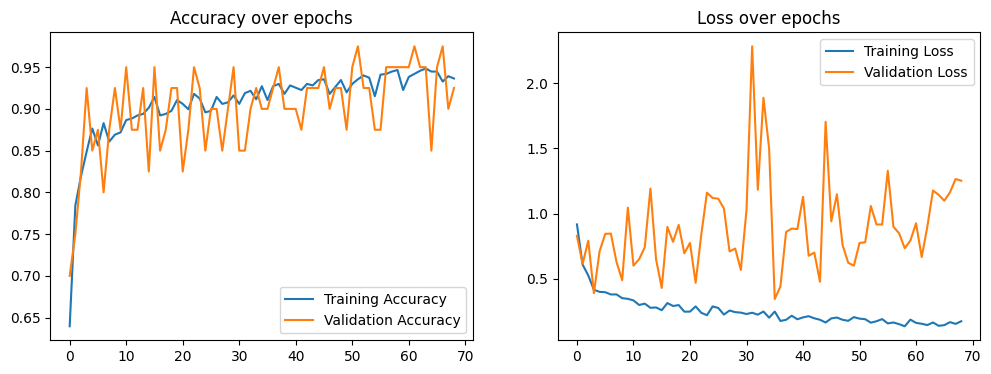

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_architecture(input_shape, num_classes):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

# Assuming the images have been resized to 224x224 pixels
input_shape = (224, 224, 3)  # height, width, number of channels
num_classes = len(categories)  # number of categories/classes

# Create the CNN model
model = create_cnn_architecture(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=69,  # The number of epochs could be adjusted based on the dataset size and model complexity
    validation_data=test_generator
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.4f}, Test loss: {test_loss:.4f}")

# Plot the training history
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')

plt.show()


1/1 [==============================] - 0s 21ms/step


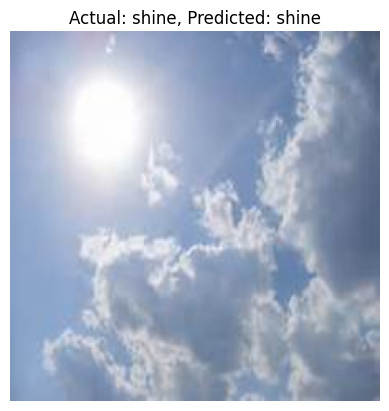

Stopped the image display updates.


In [10]:
import numpy as np
import IPython.display as display
from ipywidgets import IntProgress
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import random
import time

def display_random_image_with_prediction(model, images, labels, class_labels, target_size=(224, 224)):
    # Randomly pick an image
    random_idx = random.choice(range(len(images)))
    random_image = images[random_idx]
    true_label = class_labels[labels[random_idx]]
    
    # Preprocess the image for the model: resize and scale pixel values
    random_image_resized = random_image.resize(target_size)
    image_array = np.expand_dims(np.array(random_image_resized) / 255.0, axis=0)

    # Make a prediction
    prediction = model.predict(image_array)
    predicted_label = class_labels[np.argmax(prediction)]

    # Display the image and the labels
    plt.imshow(random_image_resized)
    plt.title(f"Actual: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()

# Assuming 'model' is your trained Keras model and 'class_labels' is a list of class labels
class_labels = categories  # Replace with your actual class labels

# Function to update the displayed image every few seconds
def update_display(model, images, labels, class_labels, update_interval=3):
    progress = IntProgress(min=0, max=update_interval)
    display.display(progress)

    try:
        while True:
            display.clear_output(wait=True)
            display_random_image_with_prediction(model, images, labels, class_labels)
            for i in range(update_interval):
                time.sleep(1)
                progress.value = i + 1
    except KeyboardInterrupt:
        print("Stopped the image display updates.")
def load_images_and_labels(directory):
    images = []
    labels = []
    label_map = {category: idx for idx, category in enumerate(categories)}  # Create a mapping for labels
    for category, idx in label_map.items():
        category_path = os.path.join(directory, category)
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            img = Image.open(img_path).convert('RGB')  # Convert to RGB for consistency
            images.append(img)
            labels.append(idx)  # Use the index as the label
    return images, labels

# Load training and testing images and labels
train_images, train_labels = load_images_and_labels(train_dir)
test_images, test_labels = load_images_and_labels(test_dir)
# To start displaying images that update every 3 seconds, call the function
update_display(model, test_images, test_labels, categories, update_interval=3)
